___
# Atividade: Teoria da Probabilidade
___

## Aula 08

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): pág. 49 a 68 - Probabilidades

**Hoje:**
1. Conceito de Probabilidade
4. Probabilidade Condicional
3. Independência de eventos
5. Teorema de Bayes. Simulação do problema de Monty Hall

**Próxima aula:**
1. Magalhães e Lima (7ª. Edição): pág. 69 a 104 - Variáveis aleatórias discretas
___

In [74]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

#Bibliotecas necessárias
from numpy.random import shuffle, randint, choice
import numpy as np


## <font color='blue'>Exercício 1</font>

Monte a simulação de 1000 jogadas de um dado idôneo de 6 faces. Faça o histograma (normalizado) da frequência.

    a) Olhando o histograma, o que pode se dizer sobre as probabilidade de cada face?
    
    b) Discorra sobre o porque da probabilidade não ser exatamente igual à teórica.

In [82]:
dado = [1,2,3,4,5,6]
numeros = []

for i in range(500000):
    escolha_dado = random.choice(dado)
    numeros.append(escolha_dado)

(array([ 177.,  184.,  156.,  167.,  165.,  151.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 6 Patch objects>)

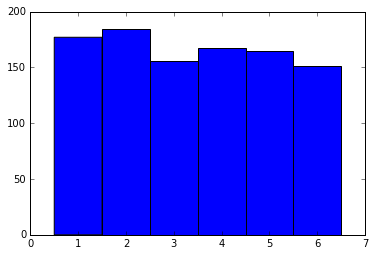

In [77]:
plt.hist(numeros, bins = np.arange(0.5,7,1))

(array([ 83270.,  83556.,  83050.,  83801.,  83122.,  83201.]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 6 Patch objects>)

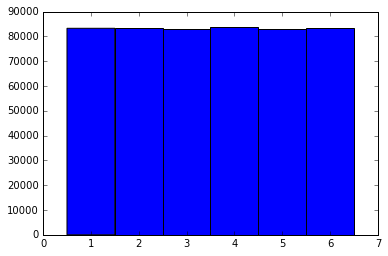

In [83]:
plt.hist(numeros, bins = np.arange(0.5,7,1))

a) Olhando o histograma, podemos concluir que as probabilidades não são iguais para todas as faces do dado, sendo a face "2" a mais provável de cair.

b) A probabilidade não é exatamente igual à teórica, pois estamos utilizando poucas jogadas. Se utilizarmos muito mais jogadas, o histograma vai ficar igual para todas. (Hist 2)

___
## <font color='blue'>Exercício 2</font>

Ampliando o espaço amostral para as possíveis jogadas de 2 dados, analise as seguintes situações:
    
    a) Jogando os dois dados ao mesmo tempo. Qual é a probabilidade de obter soma 7?
    
    b) Jogando um dado e depois o segundo dado. Qual é a probabilidade de obter soma 7 já sabendo o resultado do primeiro? Compare o resultado com item anterior! Por que é igual ou diferente?

In [99]:
dado = [1,2,3,4,5,6]
soma7 = 0

for i in range(10000):
    dado1 = random.choice(dado)
    dado2 = random.choice(dado)
    
    if (dado1 + dado2 == 7):
        soma7 += 1
        
print("A probabilidade será de:",(soma7/10000)*100,"%")

A probabilidade será de: 16.28 %


In [100]:
dado = [1,2,3,4,5,6]
soma7 = 0
acertar = 7

for i in range(10000):
    dado1 = random.choice(dado)
    acertar = 7 - dado1
    dado2 = random.choice(dado)
    if acertar == dado2:
        soma7 += 1
        
print("A probabilidade será de: ",(soma7/10000)*100,"%")

A probabilidade será de:  16.73 %


___
## <font color='blue'>Exercício 3</font>

Simule 10000 vezes o problema de Monty Hall¹ , usar o seguinte algoritmo:


* Repetir 10000 vezes:
    * Sorteie um número de porta de 1 a 3 para ser a premiada
    * Sorteie um número de porta de 1 a 3 para ser a porta escolhida.
    * Sorteie um número de porta para ser a aberta, desde que não seja a premiada e nem a porta escolhida. Assim, se:
        * porta premiada é 1 e a escolhida é 1, sorteie entre as portas 2 e 3 para ser aberta
        * porta premiada é 1 e a escolhida é 2, com probabilidade 1 deve abrir a porta 3
        * porta premiada é 1 e a escolhida é 3, com probabilidade 1 deve abrir a porta 2
        * assim para demais casos...
    
    * Calcule quantas vezes indivíduo ganha ao trocar de porta. Ou seja, se:
        * porta premiada é 1, a escolhida é 1 e aberta é 2 (ou 3), indivíduo perde se trocar de porta
        * porta premiada é 1, a escolhida é 2 e aberta é 3, indivíduo ganha se trocar de porta
        * porta premiada é 1, a escolhida é 3 e aberta é 2, indivíduo ganha se trocar de porta
        * assim para demais casos...
        
    * Exibir quantas vezes em 10000, o indivíduo ganhou ao trocar de porta.

Compare o resultado numérico com o resultado analítico obtido via Teorema de Bayes.

¹https://en.wikipedia.org/wiki/Monty_Hall_problem e 
Exercício 1.4.5 de http://www.portalaction.com.br/probabilidades/14-eventos-independentes-e-probabilidade-condicional

# Problema
Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

In [79]:
#0 Representa o Vaso Sanitário
#1 Representa o Prêmio "Free Beer 4 Life" no Sujinho
ficar = 0                                                            #Representa o número de jogos vencidos ao ficar com a porta
trocar = 0                                                           #Representa o número de jogos vencidos ao trocar de porta
 
for i in range(10000):                                               #Para 10000 simulações
    portas = [1,0,0]                                                 #Representa as portas e seus conteúdos
    random.shuffle(portas)                                           #Embaralha as portas
    
    #Embaralhadas as portas, precisamos escolher uma delas:
 
    escolha = random.choice(portas)                                  #Escolhe uma das portas
    porta_escolhida = escolha                                        #Guarda a escolha
    
    #O apresentador vai, então, abrir uma porta com um Vaso Sanitário:
    for vaso in portas:
        if vaso == 0:
            portas.remove(vaso)
            break
            
    #Teremos então uma porta com um Vaso Sanitário e outra com o "Free Beer 4 Life"
    #Vamos organizar a lista, então, assim garantimos que a primeira escolha estará em [0] e a outra em [1]
    x = portas[0]
    portas[0] = porta_escolhida
    portas[1] = x
    
    #Se mantermos a porta escolhida inicialmente e ela for a vencedora, a estratégia "ficar" ganha:
    if portas[0] == 1:                                                 
        ficar += 1
        
    #Se trocarmos a porta escolhida inicialmente e a nova for a vencedora, a estratégia "trocar" ganha: 
    else:
        trocar +=1

print("Ao mudar, a chance é de {0}%".format(trocar*100/10000))
print("Ao ficar, a chance é de {0}%".format(ficar*100/10000))

Ao mudar, a chance é de 67.64%
Ao ficar, a chance é de 32.36%
